# Dataset Viewer

This notebook loads and visualises the collected dataset of micromagnetic hysteresis simulations for 50 nm single-grain cubes. Each row in the dataset represents one simulation with randomly sampled intrinsic parameters ($M_s$, $A$, $K_1$) and the corresponding computed extrinsic properties ($H_c$, $M_r$, $BH_{\max}$).

In [1]:
import matplotlib.pyplot as plt
import mammos_entity as me

## Load the dataset

Read the collected CSV file using `mammos_entity`. The file contains ontology-annotated columns for both intrinsic inputs ($M_s$, $A$, $K_1$) and computed extrinsic outputs ($H_c$, $M_r$, $BH_{\max}$).

In [2]:
collection = me.io.entities_from_file("single_grain_cube_50nm_aligned.csv")
collection

EntityCollection(
    Ms=Entity(ontology_label='SpontaneousMagnetization', value=array([3067036.41017098, 2970993.89080065,  679871.29428583, ...,
        789641.83143586,  948696.6396304 ,  265828.51692313]), unit='A / m'),
    A=Entity(ontology_label='ExchangeStiffnessConstant', value=array([8.43874527e-12, 7.62763633e-12, 3.33284837e-12, ...,
       3.64928884e-12, 8.47223285e-12, 1.29441565e-12]), unit='J / m'),
    K1=Entity(ontology_label='UniaxialAnisotropyConstant', value=array([5675844.7803609 , 3044310.13380853, 2040252.95416996, ...,
        120472.74871775,   67863.49150036,  699257.11275545]), unit='J / m3'),
    D=Entity(ontology_label='DemagnetizingFactor', value=array([0.33333333, 0.33333333, 0.33333333, ..., 0.33333333, 0.33333333,
       0.33333333])),
    Hc=Entity(ontology_label='CoercivityHcExternal', value=array([1.19960140e+06, 4.19724580e+05, 3.94106265e+06, ...,
       5.35447723e+04, 3.65042395e+02, 3.67447413e+06]), unit='A / m'),
    Mr=Entity(ontology_label

Create a pandas DataFrame for easier handling and visualisation.

In [3]:
df = collection.to_dataframe(include_units=False)
df

,Ms,A,K1,D,Hc,Mr,BHmax,filepath
0,3.067036e+06,8.438745e-12,5.675845e+06,0.333333,1.199601e+06,3.041986e+06,2.884143e+06,data/346982_0_0/parameters.yaml
1,2.970994e+06,7.627636e-12,3.044310e+06,0.333333,4.197246e+05,2.894615e+06,2.500392e+06,data/346982_0_1/parameters.yaml
2,6.798713e+05,3.332848e-12,2.040253e+06,0.333333,3.941063e+06,6.796588e+05,1.451128e+05,data/346982_0_2/parameters.yaml
3,2.373693e+06,6.120197e-12,3.159147e+06,0.333333,8.613933e+05,2.351641e+06,1.720225e+06,data/346982_0_3/parameters.yaml
4,1.528379e+06,4.290345e-12,3.911766e+06,0.333333,2.719548e+06,1.526489e+06,7.318034e+05,data/346982_1000_0/parameters.yaml
...,...,...,...,...,...,...,...,...
12007,1.718878e+06,4.995278e-12,1.005005e+06,0.333333,3.162383e+05,1.679114e+06,8.490428e+05,data/348612_99_3/parameters.yaml
12008,1.625237e+06,4.226911e-12,7.125370e+05,0.333333,1.849053e+05,1.566629e+06,7.180755e+05,data/348612_9_0/parameters.yaml
12009,7.896418e+05,3.649289e-12,1.204727e+05,0.333333,5.354477e+04,7.613668e+05,1.682179e+05,data/348612_9_1/parameters.yaml
12010,9.486966e+05,8.472233e-12,6.786349e+04,0.333333,3.650424e+02,1.765764e+03,1.937252e+05,data/348612_9_2/parameters.yaml


## Data quality overview

Convert to a pandas DataFrame and check for failed simulations (rows containing NaN values). Rows with NaN values correspond to simulations where the magnetisation did not flip within the applied field range (down to $-10$ T), making it impossible to extract the coercivity, remanence, or maximum energy product.

In [4]:
# Stats
# Total invalid entries (rows with NaN values in any of the columns)
total_invalid_entries = df.isna().any(axis=1).sum()
print(f"Total invalid entries: {total_invalid_entries}")

# Total valid entries (rows without any NaN values)
total_valid_entries = df.dropna().shape[0]
print(f"Total valid entries: {total_valid_entries}")

# Percentage of valid entries
percentage_valid = (total_valid_entries / len(df)) * 100
print(f"Percentage of valid entries: {percentage_valid:.2f}%")


Total invalid entries: 1624
Total valid entries: 10388
Percentage of valid entries: 86.48%


Text(0.5, 1.0, 'Scatter plot of Ms vs K1 colored by Mr')

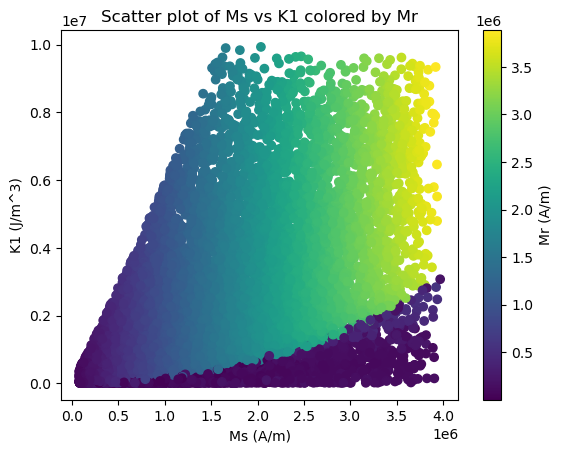

In [5]:
plt.scatter(df["Ms"], df["K1"], c=df["Mr"])
plt.xlabel("Ms (A/m)")
plt.ylabel("K1 (J/m^3)")
plt.colorbar(label="Mr (A/m)")
plt.title("Scatter plot of Ms vs K1 colored by Mr")

## Visualise the parameter space

Scatter plots of the intrinsic parameter pairs coloured by the extrinsic properties. Red crosses mark simulations where the magnetisation did not reverse (NaN results). Empty regions in the plots correspond to parameter combinations that were rejected during sampling either because they would produce an exchange length or domain wall width smaller than the 1 nm cell size or produce invalid results.

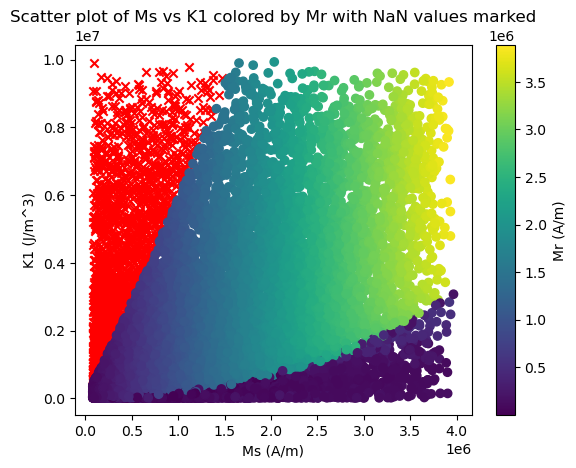

In [6]:
# create the same plot but with x for all nan values along with all the valid points
nan_df = df[df["Mr"].isna()]
plt.scatter(nan_df["Ms"], nan_df["K1"], marker='x', color='red')
plt.scatter(df["Ms"], df["K1"], c=df["Mr"])
plt.xlabel("Ms (A/m)")
plt.ylabel("K1 (J/m^3)")
plt.title("Scatter plot of Ms vs K1 colored by Mr with NaN values marked")
plt.colorbar(label="Mr (A/m)")

In [7]:
def plot(color_name):
    fig, ax = plt.subplots(1, 3, figsize=(10, 5))

    color = df[color_name]

    ax[0].scatter(df["Ms"], df["K1"], c=color)
    ax[0].set_xlabel(r"$M_s \, (\mathrm{A/m})$")
    ax[0].set_ylabel(r"$K \, (\mathrm{J/m^3})$")

    ax[1].scatter(df["Ms"], df["A"], c=color)
    ax[1].set_xlabel(r"$M_s \, (\mathrm{A/m})$")
    ax[1].set_ylabel(r"$A \, (\mathrm{J/m})$")

    scatter = ax[2].scatter(df["K1"], df["A"], c=color)
    ax[2].set_xlabel(r"$K \, (\mathrm{J/m^3})$")
    ax[2].set_ylabel(r"$A \, (\mathrm{J/m})$")
    fig.colorbar(scatter, ax=ax[2], label=color_name)
    
    plt.tight_layout()
    plt.show()

## Extrinsic property maps

Three-panel scatter plots showing combinations of intrinsic parameters, coloured by each extrinsic property ($H_c$, $M_r$, $BH_{\max}$) in turn. This reveals which regions of the intrinsic parameter space yield desirable magnetic performance. Empty regions in the plots correspond to parameter combinations that were rejected during sampling either because they would produce an exchange length or domain wall width smaller than the 1 nm cell size or produce invalid results.

**Note on coverage of the intrinsic parameter space:** The parameter space is not uniformly filled because samples where the exchange length $l_A = \sqrt{2A / (\mu_0 M_s^2)}$ or the domain wall width $l_K = \sqrt{A / K_1}$ falls below the mesh cell size (1 nm) are rejected and re-sampled to ensure accurate and stable simulations.

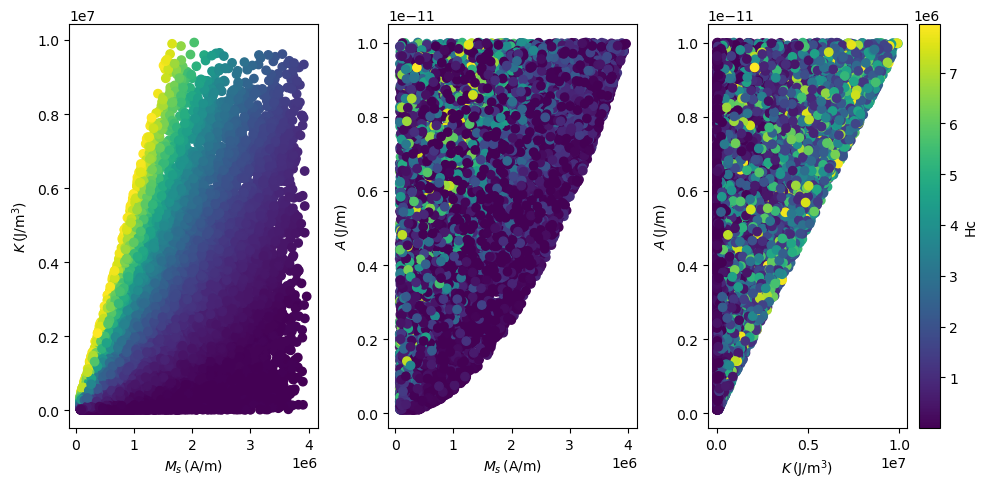

In [8]:
plot("Hc")

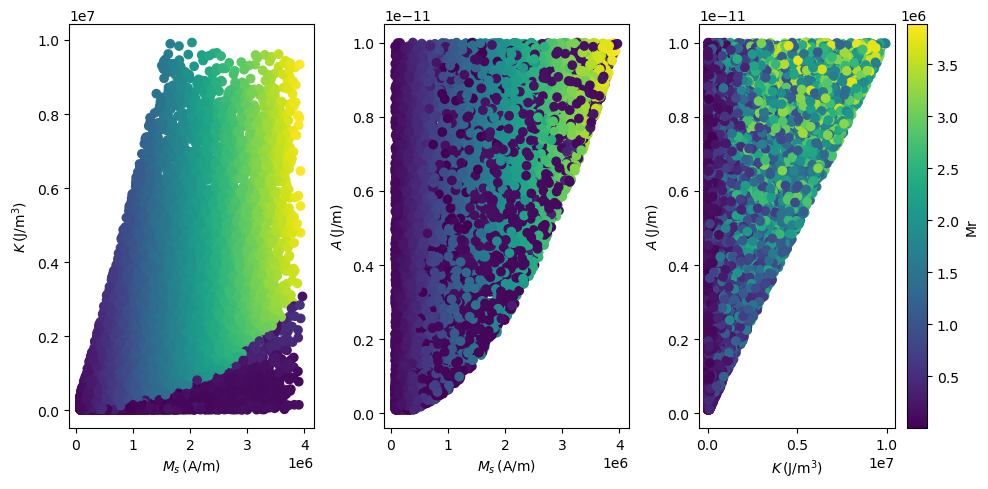

In [9]:
plot("Mr")

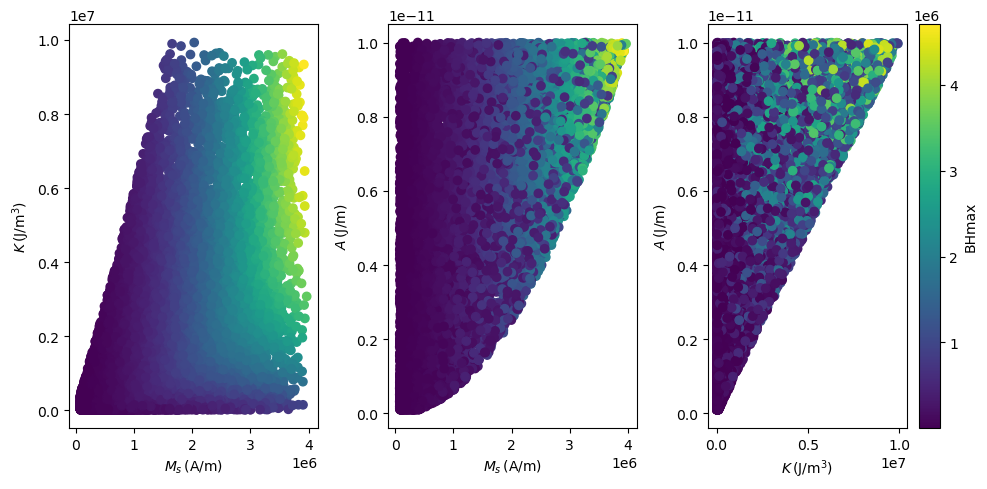

In [10]:
plot("BHmax")